In [21]:
import requests
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

Завантаження та розпакування файлу

In [22]:
url = "https://drive.google.com/uc?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6"
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))
zip_file.extractall()
data_2d = pd.read_csv('data/data_2d.csv')
mnist = pd.read_csv('data/mnist.csv')

Виведення перших кількох рядків для data_2d.csv

In [23]:
print("Data_2d.csv:")
data_2d.head()

Data_2d.csv:


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


Виведення перших кількох рядків для mnist.csv

In [24]:
print("\nMNIST.csv:")
mnist.head()


MNIST.csv:


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Визначення оптимальної кількості кластерів для data_2d.csv

In [25]:
X_2d = data_2d[data_2d.columns[:-1]]
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=1)
    kmeans.fit(X_2d)
    inertia.append(kmeans.inertia_)

Візуалізація ліктевого методу

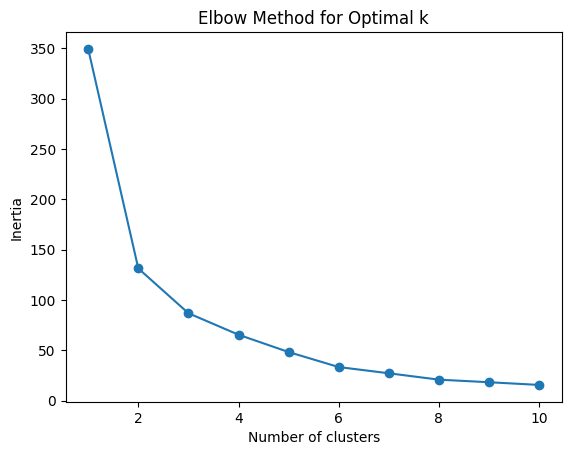

In [26]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Використання K-means для кластеризації data_2d.csv

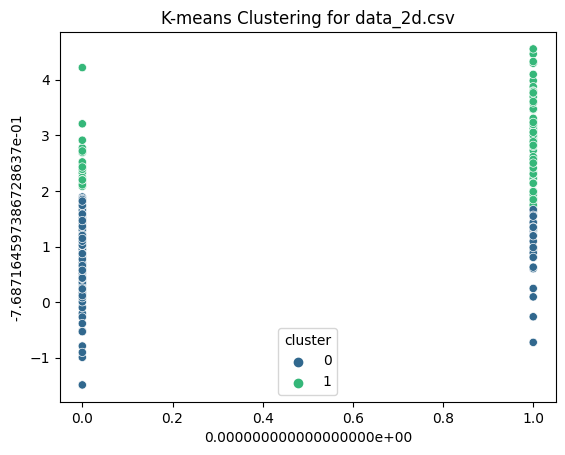

In [27]:
optimal_clusters_2d = 2

kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, random_state=42, n_init=1)
data_2d['cluster'] = kmeans_2d.fit_predict(X_2d)
sns.scatterplot(x=data_2d.columns[0], y=data_2d.columns[1], hue='cluster', data=data_2d, palette='viridis')
plt.title('K-means Clustering for data_2d.csv')
plt.show()

Визначення оптимальної кількості кластерів для mnist.csv

In [ ]:
cluster_column_index = 0
X_mnist = mnist.drop(mnist.columns[cluster_column_index], axis=1)
inertia_mnist = []
for n_clusters_mnist in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=n_clusters_mnist, random_state=42, n_init=1)
    kmeans_mnist.fit(X_mnist)
    inertia_mnist.append(kmeans_mnist.inertia_)

Візуалізація ліктевого методу для mnist.csv

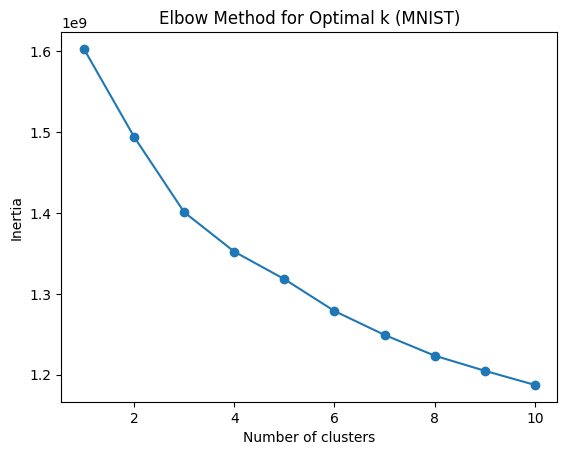

In [28]:
plt.plot(range(1, 11), inertia_mnist, marker='o')
plt.title('Elbow Method for Optimal k (MNIST)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Використання K-means для кластеризації mnist.csv

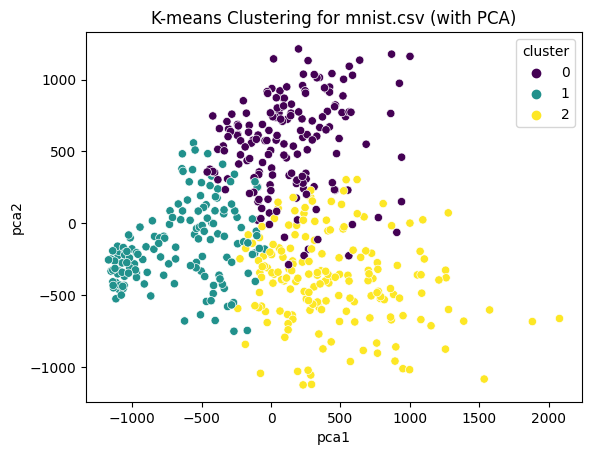

In [29]:
optimal_clusters_mnist = 3

kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, random_state=42, n_init=1)
mnist['cluster'] = kmeans_mnist.fit_predict(X_mnist)

# Зменшення розмірності за допомогою PCA для візуалізації mnist
pca = PCA(n_components=2, random_state=42)
mnist_2d = pca.fit_transform(X_mnist)
mnist[['pca1', 'pca2']] = mnist_2d

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=mnist, palette='viridis')
plt.title('K-means Clustering for mnist.csv (with PCA)')
plt.show()